# 축구 이적시장 데이터를 활용한 데이터 시각화 및 머신러닝 분석
- Developed by Dr. Keungoui KIM
- https://github.com/awekim
- Data resource: https://www.kaggle.com/code/davidcoxon/football-transfer-market-eda-basic-modelling/input

### 2. EDA 탐색적 데이터 분석

In [ ]:
import pandas as pd
import seaborn as sns

## 데이터프레임 형식으로  데이터 불러오기

In [ ]:
import pandas as pd

appearances = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/appearances.csv')
club_games = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/club_games.csv')
clubs = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/clubs.csv')
competitions = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/competitions.csv')
game_events = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/game_events.csv')
games = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/games.csv')
player_valuations = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/player_valuations.csv')
players = pd.read_csv('/content/drive/MyDrive/[Lecture]/[InvitedLecture]/08_데이터분석특강/03_포항고교육/포항고교육_강의자료/Football/players.csv')

appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556964,4300788_632349,4300788,632349,31,31,2024-03-17,Jarell Quansah,FAC,0,0,0,0,120
1556965,4300788_69633,4300788,69633,985,985,2024-03-17,Christian Eriksen,FAC,0,0,0,0,40
1556966,4300788_712117,4300788,712117,31,31,2024-03-17,Bobby Clark,FAC,0,0,0,0,6
1556967,4300788_811779,4300788,811779,985,985,2024-03-17,Alejandro Garnacho,FAC,0,0,0,1,120


## 데이터 확인하기

- head

In [ ]:
player_valuations.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


- shape

In [ ]:
print(appearances.shape)
print(club_games.shape)
print(clubs.shape)
print(competitions.shape)
print(game_events.shape)
print(player_valuations.shape)
print(players.shape)

(1556969, 13)
(134842, 11)
(426, 17)
(43, 11)
(725287, 10)
(466902, 5)
(30499, 23)


- dtypes

In [ ]:
player_valuations.dtypes

player_id                               int64
date                                   object
market_value_in_eur                     int64
current_club_id                         int64
player_club_domestic_competition_id    object
dtype: object

In [ ]:
# game_events 테이블에서 데이터 타입이 숫자형태인 변수는 무엇인가요?
game_events.dtypes[game_events.dtypes=='int64']

game_id      int64
minute       int64
club_id      int64
player_id    int64
dtype: object

In [ ]:
# appearances 테이블에서 데이터 타입이 숫자인 변수의 수는 몇 개 인가요?
sum(appearances.dtypes=='int64')

9

In [ ]:
players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0
30495,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,right,183.0,2026-06-30 00:00:00,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,NaN,2026-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


- columns

In [ ]:
players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')

In [ ]:
# players 테이블에서 5번째 컬럼명은 무엇인가요?
players.columns[4]

'last_season'

In [ ]:
# players 테이블에서 10~13번째 컬럼명은 무엇인가요?
players.columns[10:14]

Index(['date_of_birth', 'sub_position', 'position', 'foot'], dtype='object')

- describe()

In [ ]:
appearances.describe()

,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06,1.556969e+06
mean,3.053405e+06,1.871580e+05,2.972905e+03,3.644765e+03,1.485527e-01,3.808682e-03,9.625818e-02,7.582617e-02,6.954007e+01
std,5.819140e+05,1.717904e+05,7.552927e+03,9.295801e+03,3.669707e-01,6.159690e-02,3.316278e-01,2.863269e-01,2.980917e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.561228e+06,5.551200e+04,2.890000e+02,3.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01
50%,3.012051e+06,1.311020e+05,8.330000e+02,9.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.522888e+06,2.728550e+05,2.441000e+03,2.687000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.300789e+06,1.229924e+06,1.016340e+05,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02


- sort_values()

In [ ]:
players.sort_values(by='last_season', ascending=True)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
4386,51282,Mamadou,Bah,Mamadou Bah,2012,79,mamadou-bah,Guinea,Conakry,Guinea,...,left,181.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mamadou-bah/pr...,L1,Verein für Bewegungsspiele Stuttgart 1893,250000.0,1000000.0
5530,61823,Tommy,Forecast,Tommy Forecast,2012,180,tommy-forecast,England,London,England,...,NaN,198.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tommy-forecast...,GB1,Southampton FC,50000.0,50000.0
7313,91365,Andrey,Voronkov,Andrey Voronkov,2012,6994,andrey-voronkov,UdSSR,Mozyr,Belarus,...,right,187.0,2023-12-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/andrey-voronko...,UKR1,Metalurg Zaporizhya (-2016),150000.0,1000000.0
10904,168175,Frederik,Spruyt,Frederik Spruyt,2012,1184,frederik-spruyt,NaN,NaN,Belgium,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/frederik-spruy...,BE1,Koninklijke Racing Club Genk,NaN,NaN
2168,25740,Dragan,Blatnjak,Dragan Blatnjak,2012,1083,dragan-blatnjak,Jugoslawien (SFR),Studenci,Bosnia-Herzegovina,...,right,182.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dragan-blatnja...,RU1,FK Rostov,300000.0,1800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25385,581000,Eynel,Soares,Eynel Soares,2023,63007,eynel-soares,Cape Verde,Santiago,Cape Verde,...,right,174.0,2026-06-30 00:00:00,Kas-Consulting d.o.o,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/eynel-soares/p...,UKR1,LNZ Cherkasy,475000.0,475000.0
8323,111433,Frédéric,Veseli,Frédéric Veseli,2023,6646,frederic-veseli,Switzerland,Renens,Albania,...,right,183.0,2025-06-30 00:00:00,Gold and Foot,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/frederic-vesel...,TR1,Fatih Karagümrük Sportif Faaliyetler San. Tic....,250000.0,1000000.0
8322,111432,Stevie,May,Stevie May,2023,2578,stevie-may,Scotland,Perth,Scotland,...,right,178.0,2025-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/stevie-may/pro...,SC1,Saint Johnstone Football Club,350000.0,1000000.0
18945,346707,Sean,Longstaff,Sean Longstaff,2023,762,sean-longstaff,England,Newcastle upon Tyne,England,...,right,187.0,2025-06-30 00:00:00,Gol International,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sean-longstaff...,GB1,Newcastle United Football Club,25000000.0,25000000.0


In [ ]:
# 가장 키가 큰 축구 선수는 누구인가요? 몇 cm인가요?
players.sort_values(by='height_in_cm', ascending=False)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
4531,52506,Kristof,Van Hout,Kristof Van Hout,2016,968,kristof-van-hout,Belgium,Lommel,Belgium,...,right,207.0,2023-06-30 00:00:00,Govan Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kristof-van-ho...,BE1,Koninklijke Voetbal Club Westerlo,50000.0,1300000.0
27898,708678,Isaak,Touré,Isaak Touré,2023,1158,isaak-toure,France,Gonesse,France,...,left,206.0,2028-06-30 00:00:00,ND SPORTS MANAGEMENT,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/isaak-toure/pr...,FR1,Football Club Lorient-Bretagne Sud,8000000.0,8000000.0
22674,463527,Kjell,Scherpen,Kjell Scherpen,2022,499,kjell-scherpen,Netherlands,Emmen,Netherlands,...,right,206.0,2024-06-30 00:00:00,V4S,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kjell-scherpen...,NL1,Stichting Betaald Voetbal Vitesse Arnhem,2000000.0,2800000.0
29870,935048,Denys,Tvardovskyi,Denys Tvardovskyi,2023,660,denys-tvardovskyi,Ukraine,Chernivtsi,Ukraine,...,right,206.0,2028-06-30 00:00:00,ProStar,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/denys-tvardovs...,UKR1,FC Shakhtar Donetsk,200000.0,200000.0
25948,607133,Kevin,Gadellaa,Kevin Gadellaa,2022,200,kevin-gadellaa,NaN,Zaandijk,NaN,...,NaN,206.0,2024-06-30 00:00:00,Grand Stand,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kevin-gadellaa...,NL1,Football Club Utrecht,175000.0,175000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30491,1193194,Theodoros Georgios,Agorastos,Theodoros Georgios Agorastos,2023,605,theodoros-georgios-agorastos,NaN,NaN,Greece,...,NaN,NaN,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/theodoros-geor...,GR1,Aris Thessalonikis,50000.0,50000.0
30492,1196380,Berhan,Deniz,Berhan Deniz,2023,152,berhan-deniz,Türkiye,Samsun,Türkiye,...,right,NaN,2028-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/berhan-deniz/p...,TR1,Samsunspor,75000.0,75000.0
30496,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,right,NaN,2026-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0
30497,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,NaN,2026-05-31 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/adama-sidibeh/...,SC1,Saint Johnstone Football Club,NaN,NaN


In [ ]:
# 계약 종료 시점이 가장 많이 남은 축구 선수는 누구인가요?
players.sort_values(by='contract_expiration_date', ascending=False)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
25212,571020,Oihan,Sancet,Oihan Sancet,2023,621,oihan-sancet,Spain,Pamplona,Spain,...,right,188.0,2032-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/oihan-sancet/p...,ES1,Athletic Club Bilbao,35000000.0,35000000.0
24766,552425,Jon,Moncayola,Jon Moncayola,2023,331,jon-moncayola,Spain,Garinoain,Spain,...,right,182.0,2031-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jon-moncayola/...,ES1,Club Atlético Osasuna,9000000.0,12000000.0
27509,687626,Moisés,Caicedo,Moisés Caicedo,2023,631,moises-caicedo,Ecuador,Santo Domingo,Ecuador,...,right,178.0,2031-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/moises-caicedo...,GB1,Chelsea Football Club,80000000.0,90000000.0
29933,943837,NaN,Vitor Roque,Vitor Roque,2023,131,vitor-roque,Brazil,Timóteo,Brazil,...,right,172.0,2031-06-30 00:00:00,Link,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/vitor-roque/pr...,ES1,Futbol Club Barcelona,40000000.0,40000000.0
26818,648195,Enzo,Fernández,Enzo Fernández,2023,631,enzo-fernandez,Argentina,San Martín,Argentina,...,right,178.0,2031-06-30 00:00:00,DE 9 FÚTBOL,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/enzo-fernandez...,GB1,Chelsea Football Club,80000000.0,85000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30482,1169601,Thibau,Loeman,Thibau Loeman,2023,354,thibau-loeman,Belgium,Sint-Niklaas,Belgium,...,right,189.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/thibau-loeman/...,BE1,Yellow-Red Koninklijke Voetbalclub Mechelen,NaN,NaN
30488,1178474,Amadou,Koné,Amadou Koné,2023,1421,amadou-kone,Mali,Bamako,Cote d'Ivoire,...,NaN,NaN,NaN,Rudy Raba,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/amadou-kone/pr...,FR1,Stade de Reims,400000.0,400000.0
30490,1187799,Franciszek,Franczak,Franciszek Franczak,2023,2578,franciszek-franczak,Poland,Limanowa,Poland,...,right,173.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/franciszek-fra...,SC1,Saint Johnstone Football Club,150000.0,150000.0
30494,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,right,193.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0


## 데이터 필터링하기

In [ ]:
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [ ]:
players.player_id

0             10
1             26
2             65
3             77
4             80
          ...   
30494    1201580
30495    1214946
30496    1225269
30497    1229924
30498    1240762
Name: player_id, Length: 30499, dtype: int64

In [ ]:
players['player_id']

0             10
1             26
2             65
3             77
4             80
          ...   
30494    1201580
30495    1214946
30496    1225269
30497    1229924
30498    1240762
Name: player_id, Length: 30499, dtype: int64

In [ ]:
# players 테이블에서 ‘name’을 선택하세요.
players.name

0            Miroslav Klose
1        Roman Weidenfeller
2          Dimitar Berbatov
3                     Lúcio
4                Tom Starke
                ...        
30494          Yusuf Yılmaz
30495    Sid Ahmed Aissaoui
30496           Erdem Çalık
30497         Adama Sidibeh
30498      Araphat Mohammed
Name: name, Length: 30499, dtype: object

In [ ]:
# players 테이블에서 player_id, first_name, ‘last_name’을 선택하세요.
players[['player_id','first_name','last_name']]

,player_id,first_name,last_name
0,10,Miroslav,Klose
1,26,Roman,Weidenfeller
2,65,Dimitar,Berbatov
3,77,NaN,Lúcio
4,80,Tom,Starke
...,...,...,...
30494,1201580,Yusuf,Yılmaz
30495,1214946,Sid Ahmed,Aissaoui
30496,1225269,Erdem,Çalık
30497,1229924,Adama,Sidibeh


- .loc

In [ ]:
players.last_name == 'Park'

0        False
1        False
2        False
3        False
4        False
         ...  
30494    False
30495    False
30496    False
30497    False
30498    False
Name: last_name, Length: 30499, dtype: bool

In [ ]:
players.loc[players.last_name == 'Park']

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
373,4592,Ji-sung,Park,Ji-sung Park,2013,383,ji-sung-park,"Korea, South",Seoul,"Korea, South",...,both,178.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ji-sung-park/p...,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,2000000.0,12500000.0
2592,30982,Chu-young,Park,Chu-young Park,2013,11,chu-young-park,"Korea, South",Daegu,"Korea, South",...,right,182.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/chu-young-park...,GB1,Arsenal Football Club,100000.0,7000000.0
8349,111900,Ju-ho,Park,Ju-ho Park,2016,16,ju-ho-park,"Korea, South","Yongin, Gyeonggi","Korea, South",...,left,176.0,NaN,GSEN Inc,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ju-ho-park/pro...,L1,Borussia Dortmund,300000.0,2500000.0
13371,217684,Jung-bin,Park,Jung-bin Park,2016,1063,jung-bin-park,"Korea, South",Busan,"Korea, South",...,NaN,178.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jung-bin-park/...,DK1,Viborg Fodsports Forening,300000.0,500000.0
15273,260197,Ji-su,Park,Ji-su Park,2022,7378,ji-su-park,"Korea, South","Mungyeong, Gyeongbuk","Korea, South",...,both,188.0,2024-06-30 00:00:00,SQUARE SPORTS GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ji-su-park/pro...,PO1,Portimonense Futebol SAD,800000.0,900000.0
16761,292269,In-hyeok,Park,In-hyeok Park,2016,533,in-hyeok-park,"Korea, South",Seoul,"Korea, South",...,right,187.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/in-hyeok-park/...,L1,TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH,400000.0,400000.0
25861,603940,Marvin,Park,Marvin Park,2023,472,marvin-park,Spain,Palma de Mallorca,Spain,...,right,177.0,2024-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/marvin-park/pr...,ES1,Unión Deportiva Las Palmas S.A.D.,2000000.0,2000000.0


In [ ]:
# 손흥민 선수의 국가, 키, 포지션, 주발 정보를 알아보세요.
players.loc[players.name == 'Heung-min Son',['name','country_of_birth','position','foot','height_in_cm']]

,name,country_of_birth,position,foot,height_in_cm
7348,Heung-min Son,"Korea, South",Attack,both,184.0


In [ ]:
# 축구 이적 시장 데이터에 한국 선수는 몇 명이나 있나요?
players.loc[players.country_of_birth == 'Korea, South']

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
373,4592,Ji-sung,Park,Ji-sung Park,2013,383,ji-sung-park,"Korea, South",Seoul,"Korea, South",...,both,178.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ji-sung-park/p...,NL1,Eindhovense Voetbalvereniging Philips Sport Ve...,2000000.0,12500000.0
2592,30982,Chu-young,Park,Chu-young Park,2013,11,chu-young-park,"Korea, South",Daegu,"Korea, South",...,right,182.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/chu-young-park...,GB1,Arsenal Football Club,100000.0,7000000.0
6764,81796,Sung-yueng,Ki,Sung-yueng Ki,2019,762,sung-yueng-ki,"Korea, South",Gwangju,"Korea, South",...,right,189.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sung-yueng-ki/...,GB1,Newcastle United Football Club,700000.0,10000000.0
6765,81801,Chung-yong,Lee,Chung-yong Lee,2017,873,chung-yong-lee,"Korea, South",Seoul,"Korea, South",...,right,180.0,NaN,ML-Players,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/chung-yong-lee...,GB1,Crystal Palace Football Club,500000.0,7500000.0
7347,91841,Ja-cheol,Koo,Ja-cheol Koo,2018,167,ja-cheol-koo,"Korea, South","Nonsan, Chungnam","Korea, South",...,right,184.0,NaN,Apertura Sports GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ja-cheol-koo/p...,L1,FC Augsburg 1907,650000.0,5500000.0
7348,91845,Heung-min,Son,Heung-min Son,2023,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",...,both,184.0,2025-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/heung-min-son/...,GB1,Tottenham Hotspur Football Club,50000000.0,90000000.0
8349,111900,Ju-ho,Park,Ju-ho Park,2016,16,ju-ho-park,"Korea, South","Yongin, Gyeonggi","Korea, South",...,left,176.0,NaN,GSEN Inc,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ju-ho-park/pro...,L1,Borussia Dortmund,300000.0,2500000.0
8465,114831,Byung-soo,Yoo,Byung-soo Yoo,2015,1083,byung-soo-yoo,"Korea, South",Daegu,"Korea, South",...,right,183.0,2023-05-31 00:00:00,Growing Sports,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/byung-soo-yoo/...,RU1,FK Rostov,225000.0,2000000.0
9033,126638,Jeong-ho,Hong,Jeong-ho Hong,2015,167,jeong-ho-hong,"Korea, South","Jeju City, Jeju","Korea, South",...,right,186.0,NaN,CAA Stellar,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jeong-ho-hong/...,L1,FC Augsburg 1907,850000.0,2500000.0
9034,126643,Seok-yeong,Yun,Seok-yeong Yun,2016,206,seok-yeong-yun,"Korea, South","Suwon, Gyeonggi","Korea, South",...,left,183.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/seok-yeong-yun...,DK1,Brøndby Idrætsforening,375000.0,1500000.0


In [ ]:
# 내가 가장 좋아하는 축구 선수의 이름을 변수명으로 사용해서 그 선수만의 데이터셋을 만들어보세요.
zi = players.loc[players.name.str.contains('Zlatan Ibra')]

In [ ]:
# 내가 가장 좋아하는 축구 클럽의 이름을 변수명으로 사용해서 그 팀만만의 데이터셋을 만들어보세요.
tot = clubs.loc[clubs.name.str.contains('Tottenham')]

## 데이터 결합하기

In [ ]:
pd.merge(players, game_events, how='left', on='player_id')

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,highest_market_value_in_eur,game_event_id,date,game_id,minute,type,club_id,description,player_in_id,player_assist_id
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,30000000.0,b656faa0f76617cc091fd2bd36abc86b,2012-08-26,2251263.0,44.0,Cards,398.0,"1. Yellow card , Foul",NaN,NaN
1,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,30000000.0,cb243e9e11f02ed55dbd9d6a7d9e63be,2012-09-02,2251277.0,64.0,Cards,398.0,"2. Yellow card , Diving",NaN,NaN
2,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,30000000.0,53e114cb523a9e859c53584a2c604432,2012-09-02,2251277.0,39.0,Goals,398.0,", Right-footed shot, 1. Goal of the Season Ass...",NaN,55957.0
3,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,30000000.0,74626f167c5d755f977379df68bc378d,2012-09-02,2251277.0,82.0,Goals,398.0,", Right-footed shot, 2. Goal of the Season Ass...",NaN,61449.0
4,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,30000000.0,2902ce029b3d7ac7e598126689bf4132,2012-09-02,2251277.0,89.0,Substitutions,398.0,", Not reported",63824.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644887,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,eeb3132a978898e6d399248e84030c32,2024-02-24,4120991.0,77.0,Cards,2578.0,"1. Yellow card , Diving",NaN,NaN
644888,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,c1e743fb3984e62c3cf3978ceb521f1a,2024-02-18,4121003.0,82.0,Substitutions,2578.0,", Tactical",62163.0,NaN
644889,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,5d4c82e81e6766800fced4517020c912,2024-03-16,4121034.0,45.0,Cards,2578.0,"2. Yellow card , Foul",NaN,NaN
644890,1229924,Adama,Sidibeh,Adama Sidibeh,2023,2578,adama-sidibeh,NaN,NaN,The Gambia,...,NaN,d4b04656bb586da898a8fcd308d10216,2024-03-16,4121034.0,64.0,Substitutions,2578.0,", Tactical",433652.0,NaN


In [ ]:
pd.merge(players, game_events, how='left', on='player_id').columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'game_event_id', 'date', 'game_id',
       'minute', 'type', 'club_id', 'description', 'player_in_id',
       'player_assist_id'],
      dtype='object')

In [ ]:
# "left"와 "inner"의 차이는 무엇인가요?
print(pd.merge(players, game_events, how='left', on='player_id').shape)
print(pd.merge(players, game_events, how='inner', on='player_id').shape)

(644892, 32)
(637093, 32)


In [ ]:
# 토트넘 소속 선수들의 정보를 tottenham_players라는 변수에 보세요.
tottenham_players = pd.merge(clubs.loc[clubs.name.str.contains('Tottenham')],
                             players.rename(columns={'current_club_id':'club_id'}), how='inner', on='club_id')
tottenham_players

,club_id,club_code,name_x,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url_y,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,184.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carlo-cudicini...,GB1,Tottenham Hotspur Football Club,500000.0,4000000.0
1,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,182.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/william-gallas...,GB1,Tottenham Hotspur Football Club,500000.0,19000000.0
2,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/brad-friedel/p...,GB1,Tottenham Hotspur Football Club,750000.0,4000000.0
3,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,left,188.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/hugo-lloris/pr...,GB1,Tottenham Hotspur Football Club,2000000.0,30000000.0
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,left,185.0,NaN,A-GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mousa-dembele/...,GB1,Tottenham Hotspur Football Club,400000.0,21000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,NaN,2027-06-30 00:00:00,Concilium Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/romaine-mundle...,GB1,Tottenham Hotspur Football Club,600000.0,600000.0
67,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,NaN,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kallum-cesay/p...,GB1,Tottenham Hotspur Football Club,NaN,NaN
68,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,180.0,2025-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yago-santiago/...,GB1,Tottenham Hotspur Football Club,NaN,NaN
69,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,182.0,2027-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/alfie-devine/p...,GB1,Tottenham Hotspur Football Club,900000.0,900000.0


In [ ]:
tottenham_players = pd.merge(clubs.loc[clubs.name.str.contains('Tottenham')],
                             players, how='inner',
                             left_on='club_id',
                             right_on='current_club_id')
tottenham_players

,club_id,club_code,name_x,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url_y,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,184.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/carlo-cudicini...,GB1,Tottenham Hotspur Football Club,500000.0,4000000.0
1,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,182.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/william-gallas...,GB1,Tottenham Hotspur Football Club,500000.0,19000000.0
2,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/brad-friedel/p...,GB1,Tottenham Hotspur Football Club,750000.0,4000000.0
3,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,left,188.0,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/hugo-lloris/pr...,GB1,Tottenham Hotspur Football Club,2000000.0,30000000.0
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,left,185.0,NaN,A-GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/mousa-dembele/...,GB1,Tottenham Hotspur Football Club,400000.0,21000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,NaN,2027-06-30 00:00:00,Concilium Sport,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/romaine-mundle...,GB1,Tottenham Hotspur Football Club,600000.0,600000.0
67,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,NaN,2024-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/kallum-cesay/p...,GB1,Tottenham Hotspur Football Club,NaN,NaN
68,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,180.0,2025-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yago-santiago/...,GB1,Tottenham Hotspur Football Club,NaN,NaN
69,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,26,25.4,20,76.9,21,...,right,182.0,2027-06-30 00:00:00,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/alfie-devine/p...,GB1,Tottenham Hotspur Football Club,900000.0,900000.0


In [ ]:
# 토트넘 소속 선수들은 몇 명인가요?
tottenham_players.shape()
tottenham_players.player_id.nunique()

71

In [ ]:
# 토트넘 소속 선수들 중에서 선수들이 가장 많은 포지션은 무엇인가요?
tottenham_players.position.value_counts()

position
Midfield      23
Defender      21
Attack        18
Goalkeeper     9
Name: count, dtype: int64

In [ ]:
tottenham_players.net_transfer_record

0     €-151.40m
1     €-151.40m
2     €-151.40m
3     €-151.40m
4     €-151.40m
        ...    
66    €-151.40m
67    €-151.40m
68    €-151.40m
69    €-151.40m
70    €-151.40m
Name: net_transfer_record, Length: 71, dtype: object

In [ ]:
# 토트넘 소속 선수들 중에서 이적료가 가장 높은 선수는 누구인가요?
tottenham_players.loc[tottenham_players.market_value_in_eur == max(tottenham_players.market_value_in_eur),['first_name','last_name']]

,first_name,last_name
25,James,Maddison


In [ ]:
tottenham_players.country_of_citizenship

0             Italy
1            France
2     United States
3            France
4           Belgium
          ...      
66          England
67     Sierra Leone
68            Spain
69          England
70          England
Name: country_of_citizenship, Length: 71, dtype: object

In [ ]:
# 토트넘 소속 선수들 중에서 영국(England) 선수들은 몇명인가요?
tottenham_players.loc[tottenham_players.country_of_citizenship == 'England'].player_id.nunique()

31

In [ ]:
# 한국인 선수들이 가장 많이 소속된 팀은 어디인가요?
pd.merge(players.loc[players.country_of_citizenship == "Korea, South"],
         clubs.rename(columns={'name':'club_name'}), how='inner',
         left_on='current_club_id',
         right_on='club_id').club_name.value_counts()

club_name
FC Augsburg 1907                                          3
Portimonense Futebol SAD                                  2
The Celtic Football Club                                  2
1. Fußball- und Sportverein Mainz 05                      2
TSG 1899 Hoffenheim Fußball-Spielbetriebs GmbH            2
Fodbold Club Midtjylland                                  2
Tottenham Hotspur Football Club                           1
Borussia Dortmund                                         1
Arsenal Football Club                                     1
Koninklijke Atletiek Associatie Gent                      1
Paris Saint-Germain Football Club                         1
Saint Mirren Football Club                                1
FC Bayern München                                         1
Académica Coimbra                                         1
Olympiakos Syndesmos Filathlon Peiraios                   1
Hamburger SV                                              1
Vitória Sport Clube           

In [ ]:
# 한국인 선수들이 소속된 팀 중에서 국가대표 선수가 가장 많은 팀은 어디인가요?
pd.merge(players.loc[players.country_of_citizenship == "Korea, South"],
         clubs.loc[:,['club_id','name','national_team_players']],
         how='inner',
         left_on='current_club_id',
         right_on='club_id').sort_values(by='national_team_players', ascending=False).head(2)

,player_id,first_name,last_name,name_x,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,club_id,name_y,national_team_players
8,91845,Heung-min,Son,Heung-min Son,2023,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",...,CAA Base Ltd,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/heung-min-son/...,GB1,Tottenham Hotspur Football Club,50000000.0,90000000.0,148,Tottenham Hotspur Football Club,21
25,261406,Seung-woo,Ryu,Seung-woo Ryu,2016,15,seung-woo-ryu,"Korea, South","Gimhae, Gyeongnam","Korea, South",...,SQUARE SPORTS GROUP,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/seung-woo-ryu/...,L1,Bayer 04 Leverkusen Fußball,325000.0,650000.0,15,Bayer 04 Leverkusen Fußball,21


In [ ]:
# 한국인 선수들이 소속된 팀 중에서 가장 외국인 선수들이 적응하기 좋은 팀은 어디인가요?
pd.merge(players.loc[players.country_of_citizenship == "Korea, South"],
         clubs.loc[:,['club_id','name','foreigners_percentage']],
         how='inner',
         left_on='current_club_id',
         right_on='club_id').sort_values(by='foreigners_percentage', ascending=False).head(2)

,player_id,first_name,last_name,name_x,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,club_id,name_y,foreigners_percentage
12,128375,Bo-kyung,Kim,Bo-kyung Kim,2013,603,bo-kyung-kim,"Korea, South","Gurye, Jeollanam","Korea, South",...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/bo-kyung-kim/p...,GB1,Cardiff City,700000.0,3000000.0,603,Cardiff City,85.7
30,292246,Hee-chan,Hwang,Hee-chan Hwang,2023,543,hee-chan-hwang,"Korea, South","Chuncheon, Gangwon","Korea, South",...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/hee-chan-hwang...,GB1,Wolverhampton Wanderers Football Club,25000000.0,25000000.0,543,Wolverhampton Wanderers Football Club,82.6


## 데이터 시각화하기

In [ ]:
import seaborn as sns

tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
titanic = sns.load_dataset('titanic')

- 산점도 Scatter Plot

<Axes: xlabel='home_club_goals', ylabel='away_club_goals'>

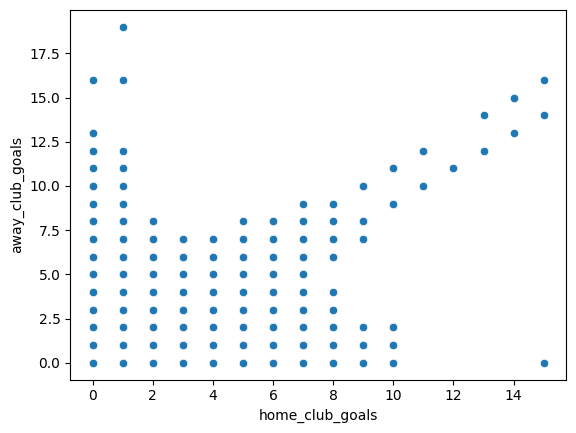

In [ ]:
sns.scatterplot(x='home_club_goals', y='away_club_goals',
                data=games)

<Axes: xlabel='home_club_goals', ylabel='away_club_goals'>

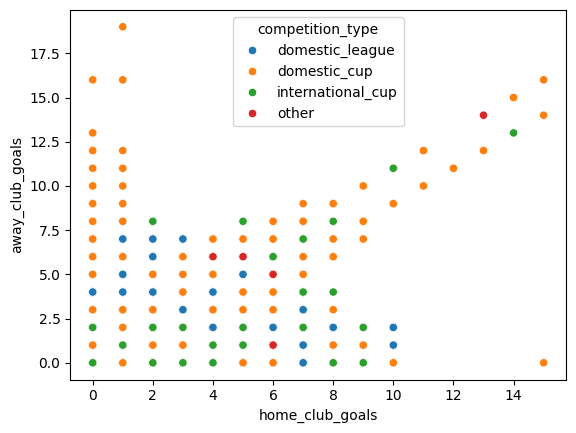

In [ ]:
sns.scatterplot(x='home_club_goals', y='away_club_goals',
                hue='competition_type', data=games)

- 선 그래프 Line Plot

In [ ]:
games_season = games.groupby('season').agg(count=('game_id', 'nunique')).reset_index()
games_season

,season,count
0,2012,5700
1,2013,5762
2,2014,5824
3,2015,5705
4,2016,5681
5,2017,5584
6,2018,5723
7,2019,5457
8,2020,5509
9,2021,5755


<Axes: xlabel='season', ylabel='count'>

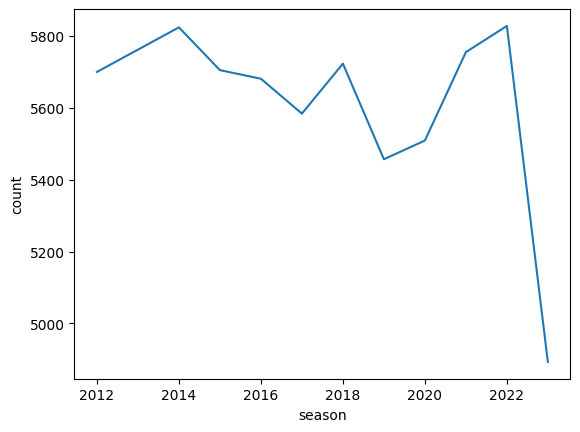

In [ ]:
sns.lineplot(x='season',y='count',data=games_season)

- 히스토그램 Histogram Plot

<Axes: xlabel='goals', ylabel='Count'>

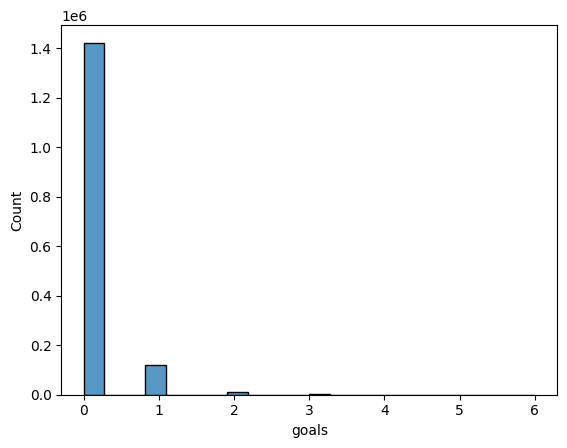

In [ ]:
sns.histplot(x='goals', data=appearances)

<Axes: xlabel='minutes_played', ylabel='Count'>

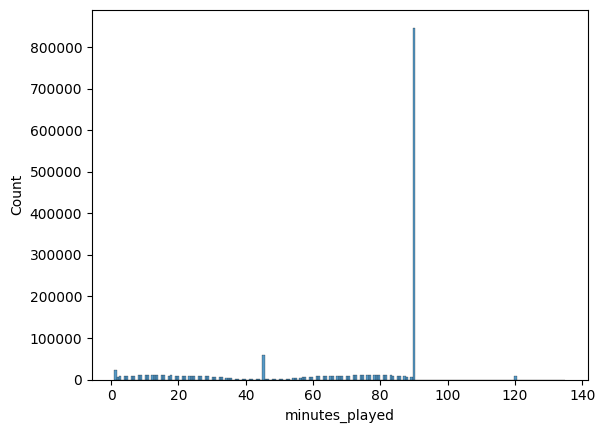

In [ ]:
sns.histplot(x='minutes_played', data=appearances)

- 막대 그래프 Bar Plot

<Axes: xlabel='position', ylabel='highest_market_value_in_eur'>

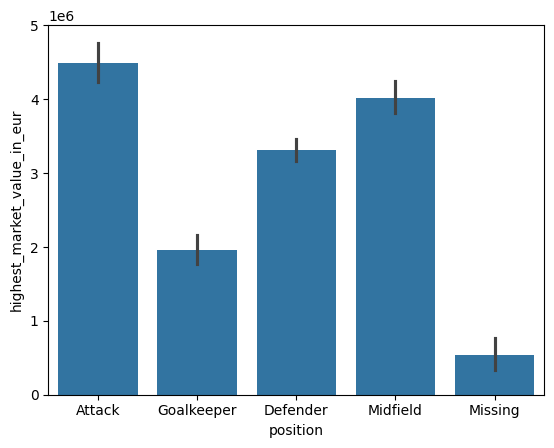

In [ ]:
sns.barplot(x='position', y='highest_market_value_in_eur',
            data=players)

<Axes: xlabel='highest_market_value_in_eur', ylabel='sub_position'>

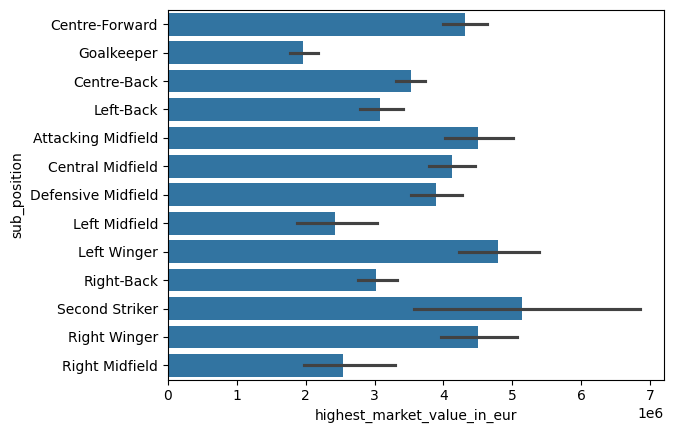

In [ ]:
sns.barplot(x='highest_market_value_in_eur', y='sub_position',
            data=players)

In [ ]:
players.head(1)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0


In [ ]:
clubs.loc[clubs.name.str.contains('Madrid')]

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
64,13,atletico-madrid,Club Atlético de Madrid S.A.D.,ES1,NaN,25,28.7,16,64.0,14,Civitas Metropolitano,70460,+€48.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/atletico-madri...
206,367,rayo-vallecano,Rayo Vallecano de Madrid S.A.D.,ES1,NaN,25,29.1,12,48.0,6,Campo de Fútbol de Vallecas,14708,€-11.60m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/rayo-vallecano...
281,418,real-madrid,Real Madrid Club de Fútbol,ES1,NaN,24,27.3,17,70.8,21,Santiago Bernabéu,81044,€-122.50m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/real-madrid/st...


In [ ]:
rm_players = pd.merge(clubs.loc[clubs.club_code == 'real-madrid',],
                      players,
                      how='inner',
                      left_on='club_id',
                      right_on='current_club_id')
rm_players.columns

Index(['club_id', 'club_code', 'name_x', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season_x',
       'filename', 'url_x', 'player_id', 'first_name', 'last_name', 'name_y',
       'last_season_y', 'current_club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship', 'date_of_birth',
       'sub_position', 'position', 'foot', 'height_in_cm',
       'contract_expiration_date', 'agent_name', 'image_url', 'url_y',
       'current_club_domestic_competition_id', 'current_club_name',
       'market_value_in_eur', 'highest_market_value_in_eur'],
      dtype='object')

In [ ]:
club_games.columns

Index(['game_id', 'club_id', 'own_goals', 'own_position', 'own_manager_name',
       'opponent_id', 'opponent_goals', 'opponent_position',
       'opponent_manager_name', 'hosting', 'is_win'],
      dtype='object')

In [ ]:
clubs.head(1)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,Sportverein Darmstadt 1898 e. V.,L1,NaN,31,26.6,11,35.5,1,Merck-Stadion am Böllenfalltor,17810,€-1.48m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...


In [ ]:
clubs.last_season.value_counts()

last_season
2023    238
2022     36
2021     21
2020     21
2017     18
2016     17
2018     17
2015     13
2014     13
2019     13
2013     11
2012      8
Name: count, dtype: int64

In [ ]:
clubs.describe()

,club_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats,coach_name,last_season
count,426.000000,0.0,426.000000,388.000000,426.000000,378.000000,426.000000,426.000000,0.0,426.000000
mean,5314.525822,NaN,24.258216,25.503351,11.000000,45.732011,4.976526,24309.316901,NaN,2020.830986
std,11752.013818,NaN,8.722600,1.556984,6.613355,19.785702,5.084177,17135.183543,NaN,3.207283
min,3.000000,NaN,0.000000,18.300000,0.000000,2.400000,0.000000,1312.000000,NaN,2012.000000
25%,421.000000,NaN,24.000000,24.400000,6.000000,30.850000,1.000000,11024.500000,NaN,2019.000000
50%,1139.500000,NaN,27.000000,25.600000,12.000000,48.000000,4.000000,20046.000000,NaN,2023.000000
75%,3415.750000,NaN,28.750000,26.600000,16.000000,59.250000,8.000000,32798.000000,NaN,2023.000000
max,83678.000000,NaN,41.000000,29.100000,26.000000,100.000000,21.000000,81365.000000,NaN,2023.000000


In [ ]:
# 손흥민은 어떤 대회에서 주로 많이 뛰고, 골을 넣고, 어시스트를 하나요? 이 문제에 답을 할 수 있는 시각화 자료를 만드세요.
# 일단 손흥민의 대회 기록을 살펴 봅시다. 데이터가 어떻게 구성되어 있나요?
appearances_son = appearances.loc[appearances.player_name=='Heung-min Son']
appearances_son

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
7573,2221754_91845,2221754,91845,41,148,2012-08-19,Heung-min Son,DFB,0,0,0,0,85
9831,2222541_91845,2222541,91845,41,148,2012-08-25,Heung-min Son,L1,0,0,0,0,70
14603,2231390_91845,2231390,91845,41,148,2012-09-01,Heung-min Son,L1,0,0,0,0,70
18939,2231424_91845,2231424,91845,41,148,2012-09-16,Heung-min Son,L1,0,0,1,0,90
21713,2231414_91845,2231414,91845,41,148,2012-09-22,Heung-min Son,L1,0,0,2,0,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535402,4095317_91845,4095317,91845,148,148,2024-02-10,Heung-min Son,GB1,0,0,0,1,28
1538899,4095329_91845,4095329,91845,148,148,2024-02-17,Heung-min Son,GB1,0,0,0,0,90
1546602,4095349_91845,4095349,91845,148,148,2024-03-02,Heung-min Son,GB1,0,0,1,0,90
1552089,4095352_91845,4095352,91845,148,148,2024-03-10,Heung-min Son,GB1,0,0,1,2,90


In [ ]:
appearances_son_gr = appearances_son.groupby('competition_id')

In [ ]:
appearances_son_sum = appearances_son_gr[['goals','assists','minutes_played']].agg('mean').reset_index()
appearances_son_sum

,competition_id,goals,assists,minutes_played
0,CGB,0.000000,0.000000,19.000000
1,CL,0.345455,0.090909,70.127273
2,CLQ,0.666667,0.000000,75.000000
3,DFB,0.428571,0.142857,74.714286
4,ECLQ,0.000000,0.000000,18.000000
5,EL,0.375000,0.250000,55.062500
6,ELQ,0.500000,1.000000,90.000000
7,FAC,0.500000,0.392857,75.750000
8,GB1,0.399317,0.225256,72.194539
9,L1,0.347368,0.094737,78.336842


<Axes: xlabel='competition_id', ylabel='goals'>

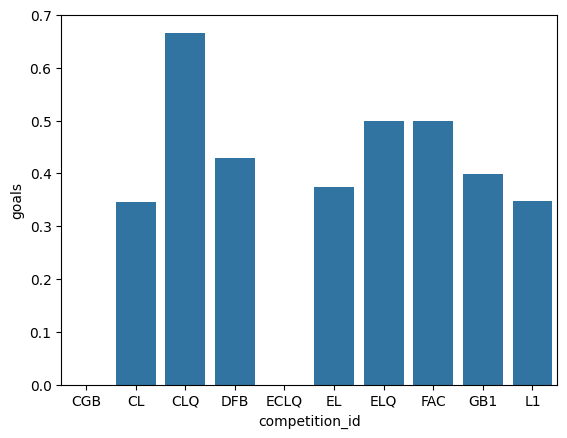

In [ ]:
sns.barplot(x='competition_id', y='goals',
            data=appearances_son_sum)

In [ ]:
appearances_son_sum_long = appearances_son_sum.melt(id_vars='competition_id',
                                                    value_vars=['goals',	'assists', 'minutes_played'])
appearances_son_sum_long

,competition_id,variable,value
0,CGB,goals,0.000000
1,CL,goals,0.345455
2,CLQ,goals,0.666667
3,DFB,goals,0.428571
4,ECLQ,goals,0.000000
5,EL,goals,0.375000
6,ELQ,goals,0.500000
7,FAC,goals,0.500000
8,GB1,goals,0.399317
9,L1,goals,0.347368


<Axes: xlabel='competition_id', ylabel='value'>

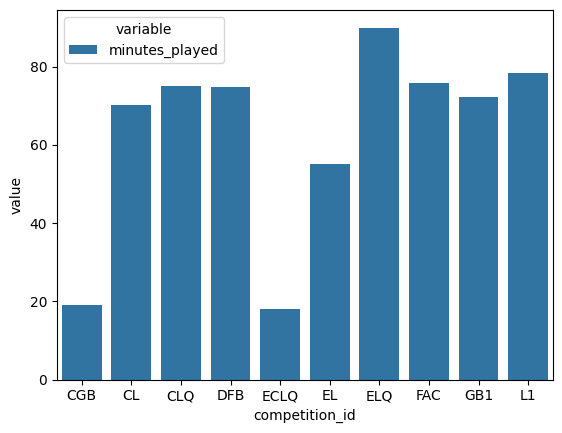

In [ ]:
sns.barplot(x='competition_id', y='value', hue='variable',
            data=appearances_son_sum_long.loc[appearances_son_sum_long.variable=='minutes_played'])

<Axes: xlabel='competition_id', ylabel='value'>

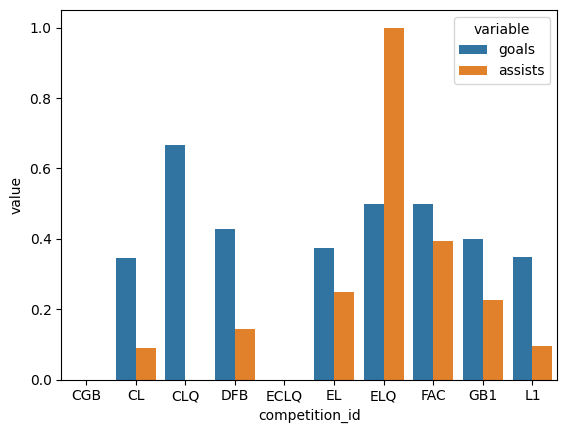

In [ ]:
sns.barplot(x='competition_id', y='value', hue='variable',
            data=appearances_son_sum_long.loc[appearances_son_sum_long.variable!='minutes_played'])